#### FastAI UNet - Training
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [1]:
import os
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES="4,5"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="4,5"

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES="4,5"


In [2]:
import numpy as np
from pathlib import Path

from fastai.vision.all import *

cwd = Path.cwd()
path = os.path.join(cwd, "battus100", "training_images")
path

/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/home/rahul/workspace/vision/eeb/mothra/data/battus100/training_images'

In [3]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])
print("Codes: ", codes)

Total Images: 80  	 Sample:  /home/rahul/workspace/vision/eeb/mothra/data/battus100/training_images/images/IMG_4810.JPG
Codes:  ['background' 'lepidopteran' 'tags' 'ruler']


<Axes: >

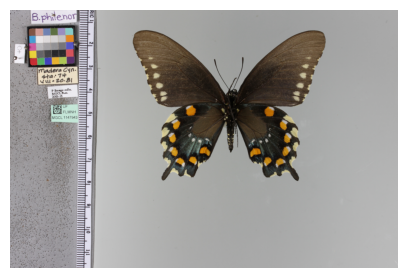

In [4]:
img = PILImage.create(files[1])
img.show(figsize=(5,5))

<Axes: >

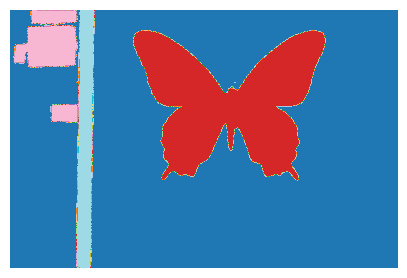

In [5]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

msk = PILMask.create(label_func(files[1]))
msk.show(figsize=(5,5), alpha=1)

In [6]:
name2id = {v:k for k,v in enumerate(codes)}
print("Unique labels:",np.unique(msk), "\n", name2id)

Unique labels: [0 1 2 3] 
 {'background': 0, 'lepidopteran': 1, 'tags': 2, 'ruler': 3}


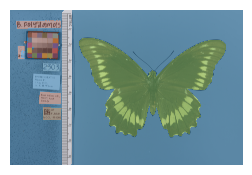

In [7]:
dls = SegmentationDataLoaders.from_label_func(path, bs=1, fnames=files, label_func=label_func, codes=codes)
dls.show_batch()

## Train

In [8]:
# Now, loading the model 
learn = unet_learner(dls, vgg19,  pretrained=True) # self_attention=True, weights="./init/segmentation_test-4classes.pkl"

/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# Train for 50 epochs
learn.fine_tune(50)

epoch,train_loss,valid_loss,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 34.37 GiB (GPU 0; 47.54 GiB total capacity; 35.01 GiB already allocated; 10.44 GiB free; 35.45 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [10]:
# Model export using pickle protocol - https://docs.fast.ai/learner.html#learner
learn.export('battus10_segmentation_test-4classes-resnet18-b2-e50.pkl')

/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


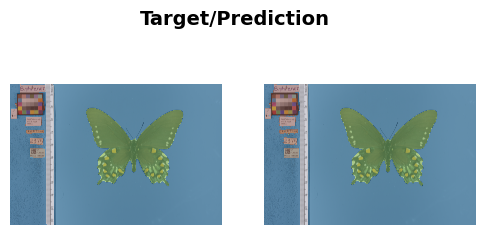

In [11]:
learn.show_results(max_n=2)